<a href="https://colab.research.google.com/github/NaveedIqbalSandhu/ML-Project/blob/main/Big_Mart_Sales_Prediction_Using_XGBOOST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
sales_data=pd.read_csv('/content/Train.csv')

In [ ]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
sales_data.shape

(8523, 12)

In [ ]:
sales_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
for i in sales_data.select_dtypes('object'):
  print(i)


Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [ ]:
sales_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [ ]:
sales_data.replace({'Item_Fat_Content':{'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'}},inplace=True)

In [ ]:
sales_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [ ]:
sales_data['Outlet_Size'].value_counts()

,count
Outlet_Size,
Medium,2793
Small,2388
High,932


In [ ]:
sales_data['Outlet_Location_Type'].value_counts()

,count
Outlet_Location_Type,
Tier 3,3350
Tier 2,2785
Tier 1,2388


In [ ]:
sales_data['Outlet_Type'].value_counts()

,count
Outlet_Type,
Supermarket Type1,5577
Grocery Store,1083
Supermarket Type3,935
Supermarket Type2,928


In [ ]:
sales_data['Item_Identifier'].value_counts()

,count
Item_Identifier,
FDW13,10
FDG33,10
NCY18,9
FDD38,9
DRE49,9
...,...
FDY43,1
FDQ60,1
FDO33,1


In [ ]:
sales_data['Item_Type'].value_counts()

,count
Item_Type,
Fruits and Vegetables,1232
Snack Foods,1200
Household,910
Frozen Foods,856
Dairy,682
Canned,649
Baking Goods,648
Health and Hygiene,520
Soft Drinks,445


In [ ]:
sales_data['Outlet_Identifier'].value_counts()

,count
Outlet_Identifier,
OUT027,935
OUT013,932
OUT049,930
OUT046,930
OUT035,930
OUT045,929
OUT018,928
OUT017,926
OUT010,555


In [ ]:
mean=sales_data['Item_Weight'].mean()
mean

12.857645184135976

In [ ]:
sales_data['Item_Weight'].fillna(mean,inplace=True)

<ipython-input-20-edf6d268bbc6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['Item_Weight'].fillna(mean,inplace=True)


In [ ]:
sales_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [ ]:
mode=sales_data['Outlet_Size'].mode()[0]

In [ ]:
sales_data['Outlet_Size'].fillna(mode,inplace=True)

<ipython-input-23-376bd0ec60a1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_data['Outlet_Size'].fillna(mode,inplace=True)


In [ ]:
sales_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [ ]:
sales_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<ipython-input-26-6449f190009e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Weight'])


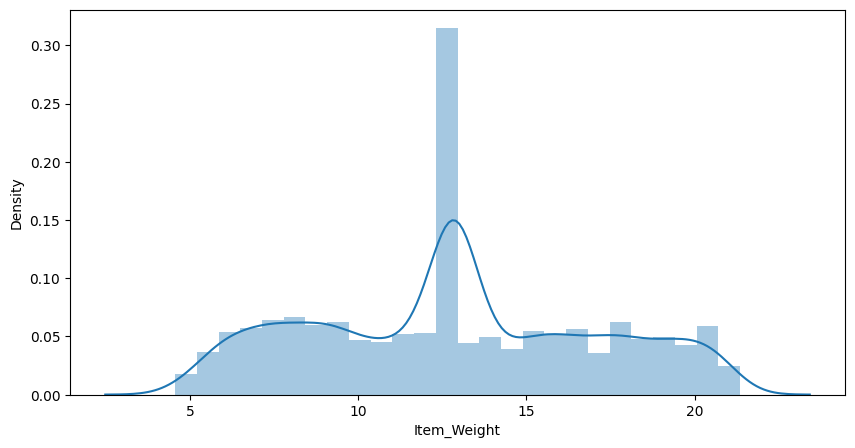

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(sales_data['Item_Weight'])
plt.show()

<ipython-input-27-be6a91531006>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Visibility'])


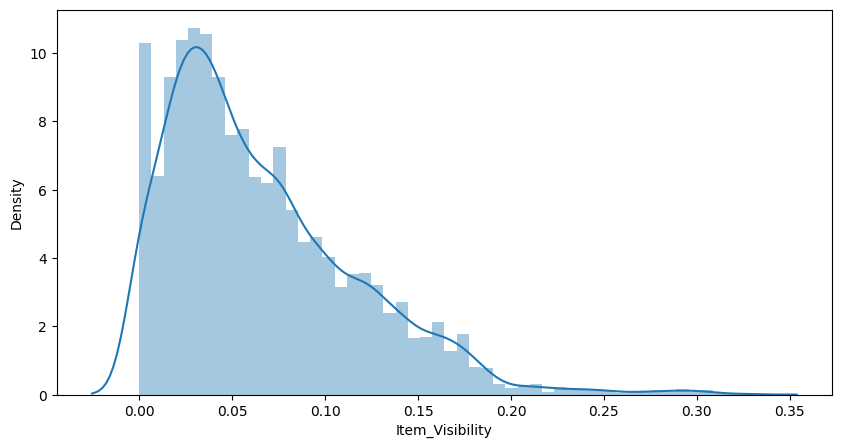

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(sales_data['Item_Visibility'])
plt.show()

<ipython-input-28-68d7cd69e56e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_MRP'])


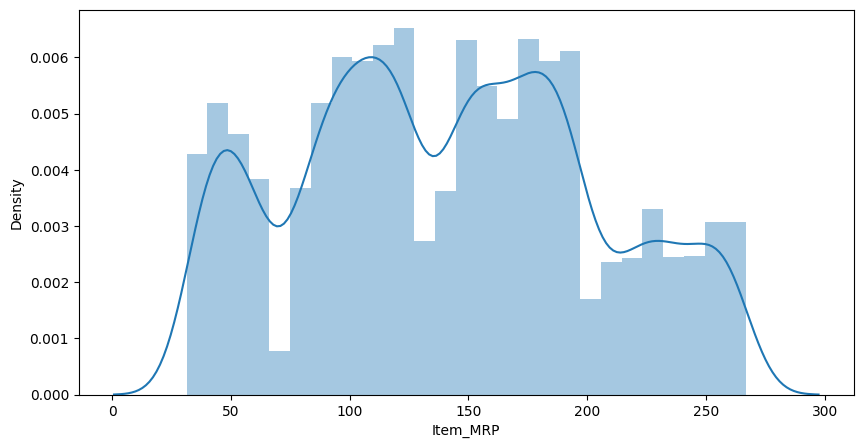

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(sales_data['Item_MRP'])
plt.show()

<ipython-input-29-507c8277a8f7>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sales_data['Item_Outlet_Sales'])


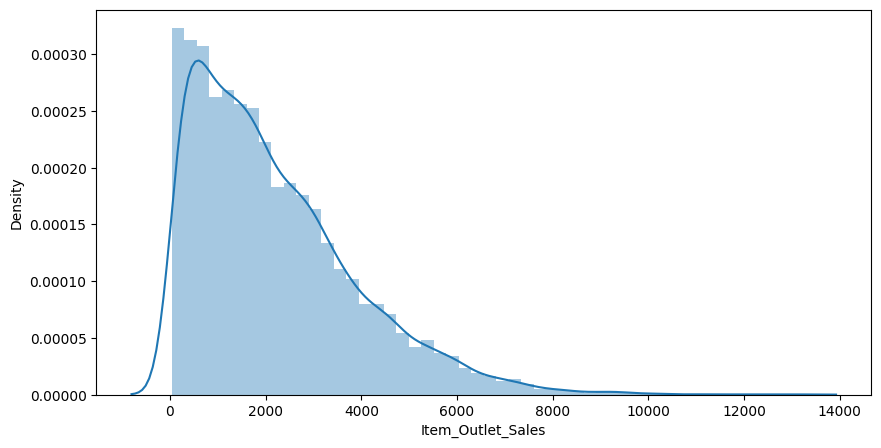

In [ ]:
plt.figure(figsize=(10,5))
sns.distplot(sales_data['Item_Outlet_Sales'])
plt.show()

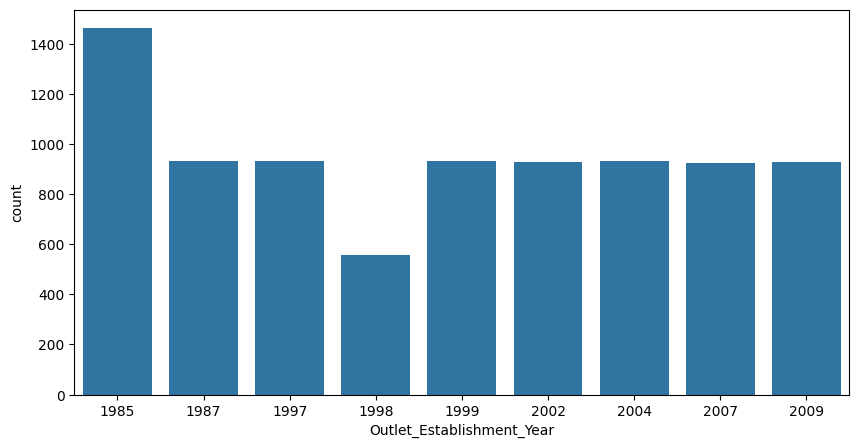

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Establishment_Year',data=sales_data)
plt.show()

In [ ]:
for i in sales_data.select_dtypes('object'):
  print(i)

Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


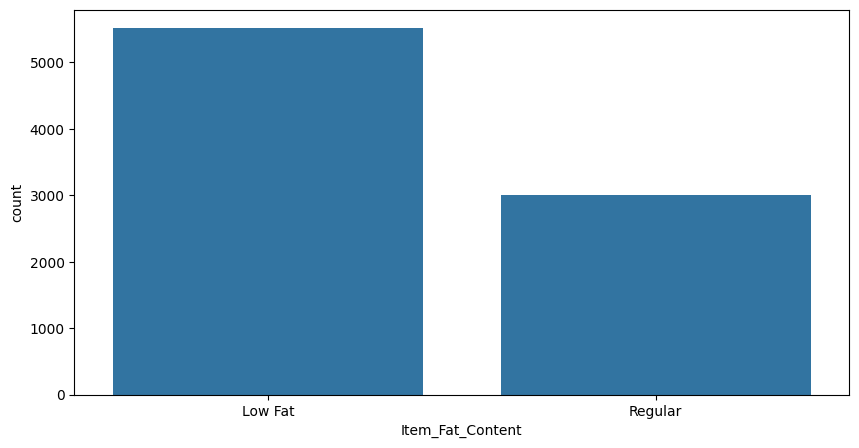

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Item_Fat_Content',data=sales_data)
plt.show()

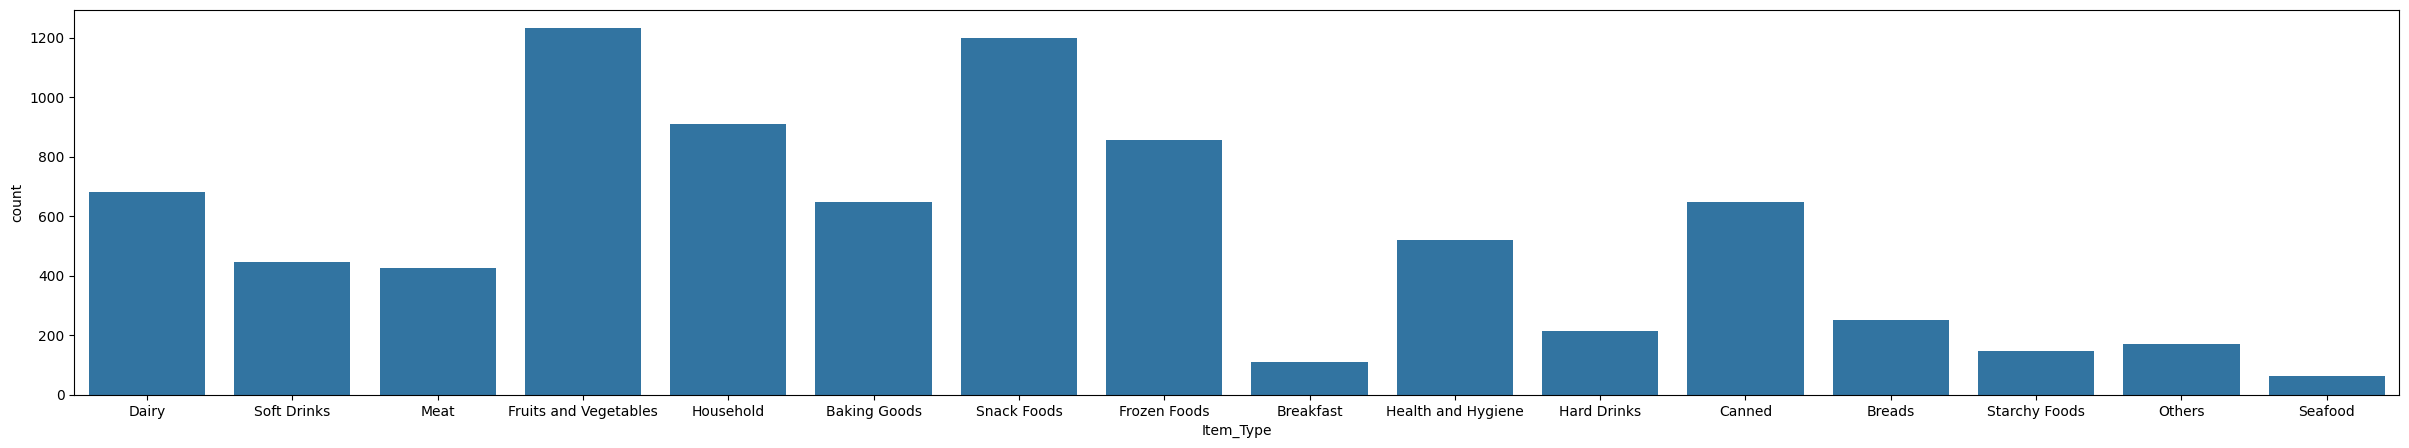

In [ ]:
plt.figure(figsize=(30,5))
sns.countplot(x='Item_Type',data=sales_data)
plt.show()

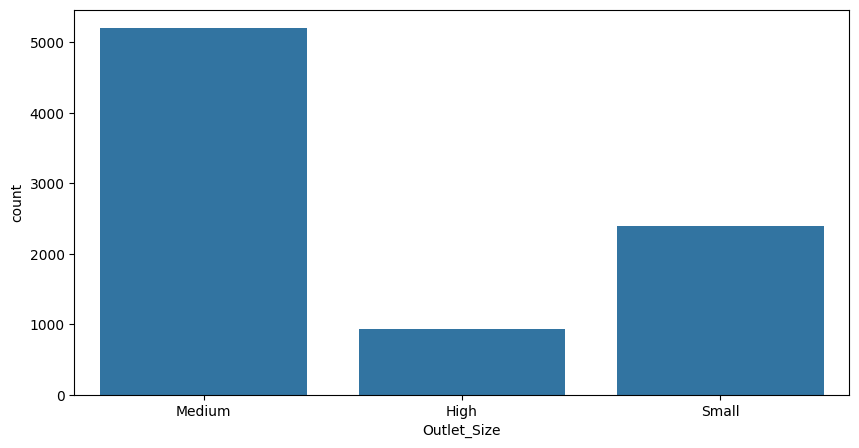

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='Outlet_Size',data=sales_data)
plt.show()

**Data Preprocessing**

**Encoding**

In [ ]:
encoder=LabelEncoder()

In [ ]:
for i in sales_data.select_dtypes('object'):
  print(i)

Item_Identifier
Item_Fat_Content
Item_Type
Outlet_Identifier
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [ ]:
sales_data['Item_Identifier']=encoder.fit_transform(sales_data['Item_Identifier'])

sales_data['Item_Fat_Content']=encoder.fit_transform(sales_data['Item_Fat_Content'])

sales_data['Item_Type']=encoder.fit_transform(sales_data['Item_Type'])

sales_data['Outlet_Identifier']=encoder.fit_transform(sales_data['Outlet_Identifier'])

sales_data['Outlet_Size']=encoder.fit_transform(sales_data['Outlet_Size'])

sales_data['Outlet_Location_Type']=encoder.fit_transform(sales_data['Outlet_Location_Type'])

sales_data['Outlet_Type']=encoder.fit_transform(sales_data['Outlet_Type'])

In [ ]:
sales_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [ ]:
x=sales_data.drop('Item_Outlet_Sales',axis=1)
y=sales_data['Item_Outlet_Sales']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(8523, 11) (6818, 11) (1705, 11)


**Model Training**

In [ ]:
regressor=XGBRegressor()

In [ ]:
pip install --upgrade xgboost


In [ ]:
from xgboost import XGBRegressor

class PatchedXGBRegressor(XGBRegressor):
    def __sklearn_tags__(self):
        return {
            'non_deterministic': True,
            'requires_positive_X': False,
            'requires_positive_y': False,
            'poor_score': False,
            'allow_nan': True,
        }

# Use the patched version
model = PatchedXGBRegressor()



In [ ]:
!pip install --upgrade scikit-learn
from xgboost import XGBRegressor

class PatchedXGBRegressor(XGBRegressor):
    def __sklearn_tags__(self):
        return {
            'non_deterministic': True,
            'requires_positive_X': False,
            'requires_positive_y': False,
            'poor_score': False,
            'allow_nan': True,
        }

# Use the patched version
regressor = PatchedXGBRegressor() # This line was changed to replace the original regressor assignment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 99.0 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [ ]:
regressor.fit(x_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The PatchedXGBRegressor or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


AttributeError: 'super' object has no attribute '__sklearn_tags__'

AttributeError: 'super' object has no attribute '__sklearn_tags__'

PatchedXGBRegressor(base_score=None, booster=None, callbacks=None,
                    colsample_bylevel=None, colsample_bynode=None,
                    colsample_bytree=None, device=None,
                    early_stopping_rounds=None, enable_categorical=False,
                    eval_metric=None, feature_types=None, gamma=None,
                    grow_policy=None, importance_type=None,
                    interaction_constraints=None, learning_rate=None,
                    max_bin=None, max_cat_threshold=None,
                    max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                    max_leaves=None, min_child_weight=None, missing=nan,
                    monotone_constraints=None, multi_strategy=None,
                    n_estimators=None, n_jobs=None, num_parallel_tree=None,
                    random_state=None, ...)

In [ ]:
y_pred=regressor.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score,accuracy_score

In [ ]:
# Instead of using f1_score, which is for classification, use metrics appropriate for regression.
# Here are some common regression metrics:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 1524978.6391779145
Mean Absolute Error: 868.1848996347816
R-squared: 0.5060117482714839
